In [1]:
% matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

import sys
sys.path.insert(0, '/home/jr0th/github/segmentation/code/')
import helper.model_builder
import helper.metrics

import skimage.io

import numpy as np

import time

import keras

# build session running on a specific GPU
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "1"
session = tf.Session(config = configuration)

keras.backend.set_session(session)

Using TensorFlow backend.


RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
img_path = '/home/jr0th/github/segmentation/data/BBBC022/x/images_normalized_8bit/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'
ann_path = '/home/jr0th/github/segmentation/data/BBBC022/raw/raw_annotations/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'
bdry_path = '/home/jr0th/github/segmentation/data/BBBC022/boundary_4/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'
cp_seg_path = '/home/jr0th/github/segmentation/data/BBBC022/raw/raw_cp_segmentations/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.tiff'
err_cp_path = '/home/jr0th/github/segmentation/experiments/CP/error_img/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'
err_dl_path = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png'
img_orig = skimage.io.imread(img_path)

# get image
dim1 = img_orig.shape[0]
dim2 = img_orig.shape[1]

img_rescaled = img_orig / 255
img_input = img_rescaled.reshape((1, dim1, dim2, 1))


# build model and load weights
model = helper.model_builder.get_model_1_class(dim1, dim2)

/home/jr0th/github/segmentation/code/helper/model_builder.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/jr0th/github/segmentation/code/helper/model_builder.py:27: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/jr0th/github/segmentation/code/helper/model_builder.py:33: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jr0th/github/segmentation/code/helper/mode

# Probmap Patch

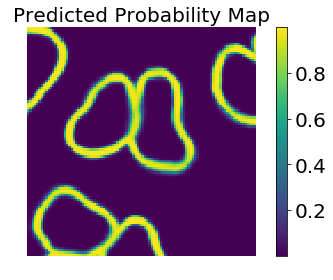

In [16]:
weights = '/home/jr0th/github/segmentation/checkpoints/DL_on_Hand_boundary_augment/checkpoint_0199.hdf5'
model.load_weights(weights)
pred = model.predict(img_input).squeeze()
plt.imshow(pred[0:100, 0:100])
plt.title('Predicted Probability Map', fontsize=20)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20) 
plt.axis('off')
plt.tight_layout()
plt.savefig('vis_benchmark_hand_dl_probmap.eps')

# DL

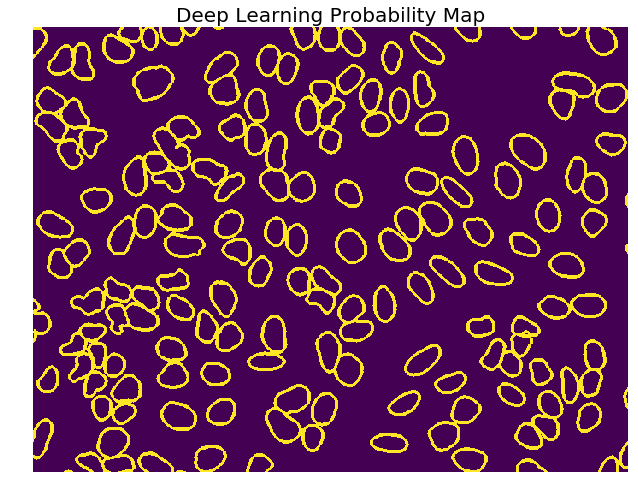

In [11]:
contour = helper.metrics.probmap_to_contour(pred)
plt.figure(figsize=(10,7))
plt.imshow(contour)
plt.axis('off')
plt.title('Deep Learning Probability Map', fontsize=20)
plt.tight_layout()
plt.savefig('vis_benchmark_hand_dl_probmap.eps')

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


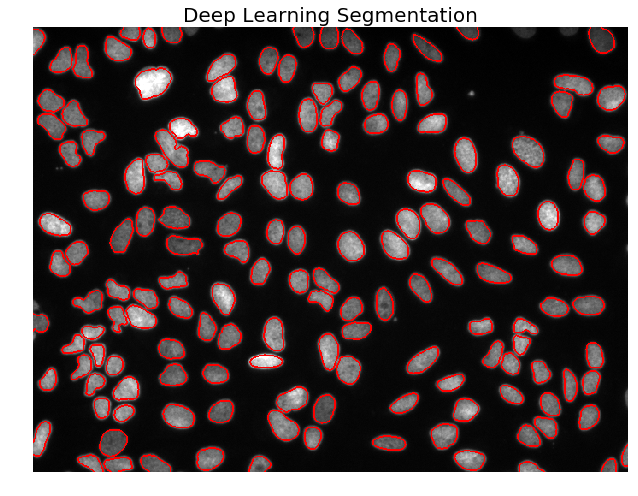

In [12]:
label = helper.metrics.contour_to_label(contour, img_rescaled)
vis = skimage.segmentation.mark_boundaries(img_orig, label, color=(1,0,0), mode='thick')
plt.figure(figsize=(10,7))
plt.imshow(vis)
plt.axis('off')
plt.title('Deep Learning Segmentation', fontsize=20)
plt.tight_layout()
plt.savefig('vis_benchmark_hand_dl.eps')

# GT

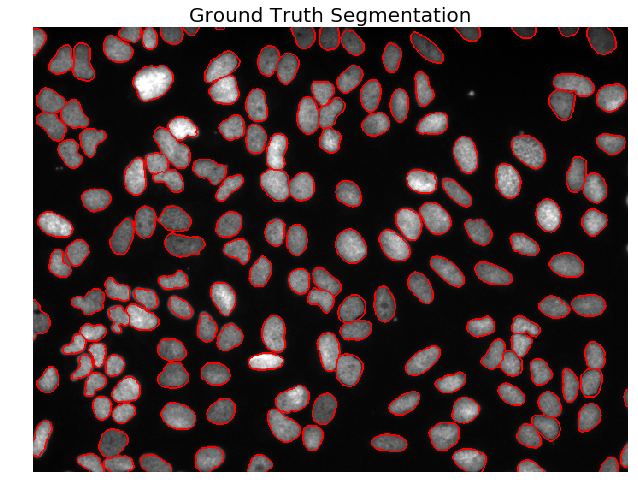

In [5]:
annot = skimage.io.imread(ann_path)[:,:,0]
vis = skimage.segmentation.mark_boundaries(img_orig, annot, color=(1,0,0), mode='thick')
plt.figure(figsize=(10,7))
plt.imshow(vis)
plt.axis('off')
plt.title('Ground Truth Segmentation', fontsize=20)
plt.tight_layout()
plt.savefig('vis_benchmark_hand_gt.eps')

# CP

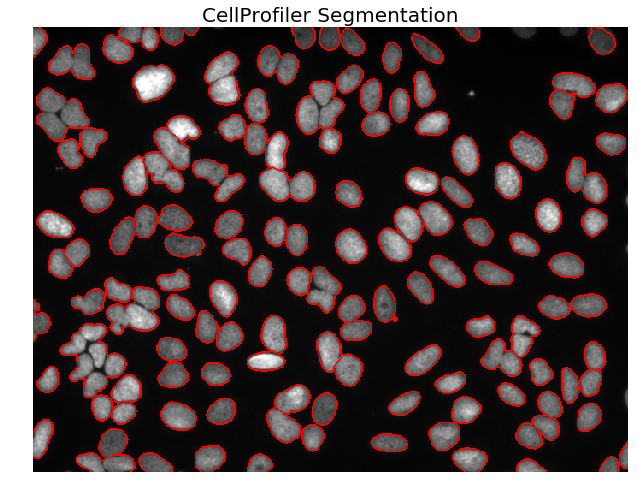

In [6]:
cp_annot = skimage.io.imread(cp_seg_path)
vis = skimage.segmentation.mark_boundaries(img_orig, cp_annot, color=(1,0,0), mode='thick')
plt.figure(figsize=(10,7))
plt.imshow(vis)
plt.axis('off')
plt.title('CellProfiler Segmentation', fontsize=20)
plt.tight_layout()
plt.savefig('vis_benchmark_hand_cp.eps')

In [7]:
# Error Image

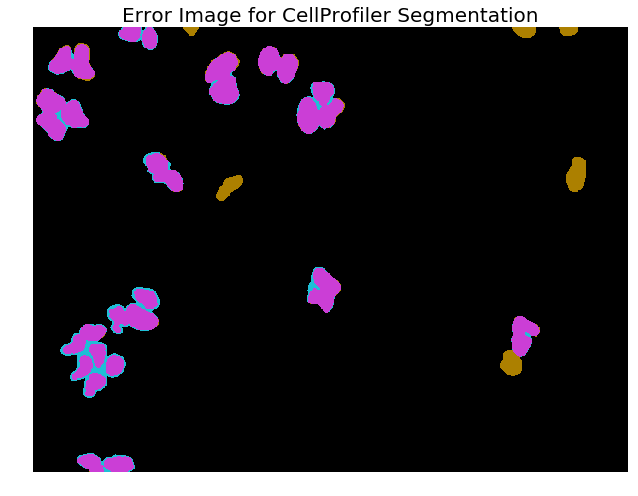

In [8]:
vis = skimage.io.imread(err_cp_path)
plt.figure(figsize=(10,7))
plt.imshow(vis)
plt.axis('off')
plt.title('Error Image for CellProfiler Segmentation', fontsize=20)
plt.tight_layout()
plt.savefig('vis_benchmark_hand_err_cp.eps')

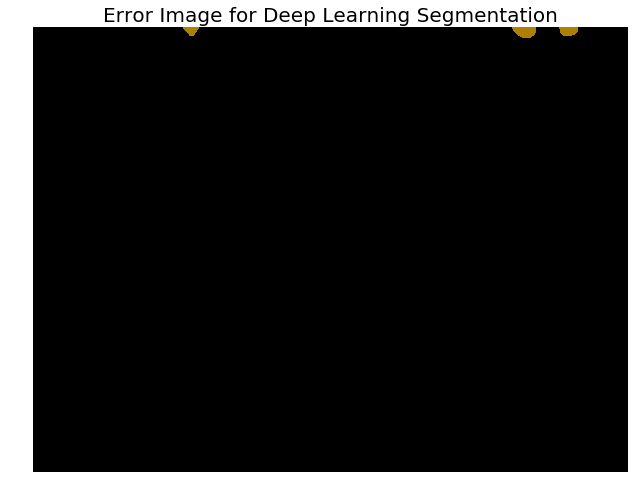

In [9]:
vis = skimage.io.imread(err_dl_path)
plt.figure(figsize=(10,7))
plt.imshow(vis)
plt.axis('off')
plt.title('Error Image for Deep Learning Segmentation', fontsize=20)
plt.tight_layout()
plt.savefig('vis_benchmark_hand_err_dl.eps')